In [236]:
import yfinance as yf
import pandas as pd
import numpy as np
import json
import os

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
assets = {
    'Bitcoin': 'BTC-USD',
    'Gold': 'ITB',  # Or another gold ETF
    'ETF': 'IWDA.AS',  # Adjust based on your broker/market
    'Stock': 'AAPL'
}

In [239]:
start_date = '2014-12-31'
end_date = '2025-08-01'

In [240]:
data = pd.DataFrame()

for name, ticker in assets.items():
    df = yf.download(ticker, start=start_date, end=end_date)['Close']
    data[name] = df

data.to_csv("asset_prices.csv")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30212\3993327765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30212\3993327765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30212\3993327765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30212\3993327765.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df 

In [241]:
price_data = pd.read_csv("asset_prices.csv", index_col=0, parse_dates=True)
price_data = price_data.ffill()
print(price_data.head())

               Bitcoin       Gold        ETF      Stock
Date                                                   
2014-12-31  320.192993  24.221413  34.365002  24.521847
2015-01-01  314.248993  24.221413  34.365002  24.521847
2015-01-02  315.032013  24.024864  34.250000  24.288582
2015-01-03  281.082001  24.024864  34.250000  24.288582
2015-01-04  264.195007  24.024864  34.250000  24.288582


In [242]:
cols_to_fix = ['Gold', 'ETF', 'Stock']

for col in cols_to_fix:
    if pd.isna(portfolio_value.iloc[0][col]):
        portfolio_value.iloc[0, portfolio_value.columns.get_loc(col)] = portfolio_value.iloc[1][col]

print(price_data.head())

               Bitcoin       Gold        ETF      Stock
Date                                                   
2014-12-31  320.192993  24.221413  34.365002  24.521847
2015-01-01  314.248993  24.221413  34.365002  24.521847
2015-01-02  315.032013  24.024864  34.250000  24.288582
2015-01-03  281.082001  24.024864  34.250000  24.288582
2015-01-04  264.195007  24.024864  34.250000  24.288582


In [243]:
portfolio_value = pd.DataFrame(index=price_data.index)
daily_investment = 1.0
for asset in price_data.columns:
    total_shares = 0
    values = []
    for price in price_data[asset]:
        if pd.notna(price):
            # Buy fractional shares
            total_shares += daily_investment / price
            current_value = total_shares * price
        else:
            current_value = values[-1] if values else 0
        values.append(current_value)
    portfolio_value[asset] = values
portfolio_value['Saving'] = [daily_investment * (i + 1) for i in range(len(portfolio_value))]

In [244]:
daily_rate = 0.05 / 365  # 5% năm → lãi hàng ngày
days = len(portfolio_value)

future_values = [
    1 * ((1 + daily_rate) ** (days - i - 1)) for i in range(days)
]

portfolio_value['Saving'] = pd.Series(future_values, index=portfolio_value.index).cumsum()

In [245]:
portfolio_value.to_excel("portfolio_growth.xlsx")

In [246]:
print(os.getcwd())

C:\Users\lenovo


In [247]:
print(portfolio_value.tail())

                  Bitcoin         Gold          ETF         Stock       Saving
Date                                                                          
2025-07-27  292513.257679  9145.828978  7290.664123  14883.817527  5092.659647
2025-07-28  288782.148826  9168.684792  7291.664123  14896.647626  5093.660058
2025-07-29  288777.447542  9169.684792  7385.111649  14704.175720  5094.660332
2025-07-30  288555.694923  8942.968368  7418.702857  14550.665911  5095.660469
2025-07-31  283480.182842  8874.735334  7436.709141  14448.652645  5096.660469


In [248]:
portfolio_value.to_excel("D:/New folder/portfolio_value.xlsx")
print("✅ Portfolio saved to 'D:/New folder/portfolio_value.xlsx'")

✅ Portfolio saved to 'D:/New folder/portfolio_value.xlsx'


In [249]:
df = pd.read_excel("portfolio_growth.xlsx")
df.head(10)

,Date,Bitcoin,Gold,ETF,Stock,Saving
0,2014-12-31,1.000000,1.000000,1.000000,1.000000,1.697940
1,2015-01-01,1.981436,2.000000,2.000000,2.000000,3.395648
2,2015-01-02,2.986373,2.983771,2.993307,2.980975,5.093123
3,2015-01-03,3.664541,3.983771,3.993307,3.980975,6.790365
4,2015-01-04,4.444381,4.983771,4.993307,4.980975,8.487375
5,2015-01-05,5.617298,5.931351,5.938636,5.840653,10.184153
6,2015-01-06,6.857053,6.863631,6.881660,6.841202,11.880698
7,2015-01-07,8.052279,8.087773,7.983192,7.937131,13.577011
8,2015-01-08,8.751676,9.278037,9.153198,9.242093,15.273091
9,2015-01-09,9.969704,10.302507,10.059744,10.252007,16.968939


In [250]:
df.isnull().sum()

Date       0
Bitcoin    0
Gold       0
ETF        0
Stock      0
Saving     0
dtype: int64

In [251]:
df.dtypes

Date       datetime64[ns]
Bitcoin           float64
Gold              float64
ETF               float64
Stock             float64
Saving            float64
dtype: object

In [252]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

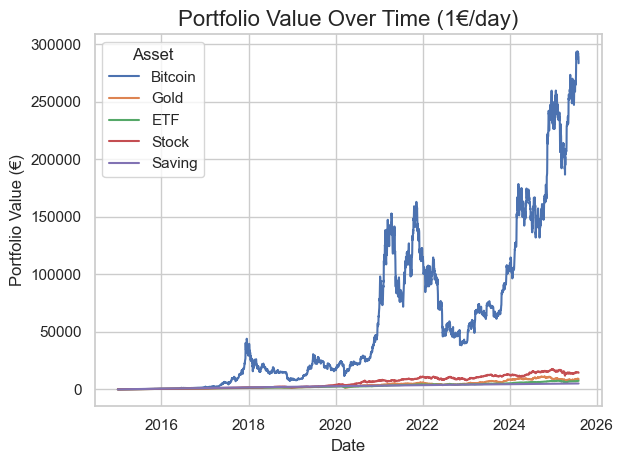

In [253]:
for column in portfolio_value.columns:
    plt.plot(portfolio_value.index, portfolio_value[column], label=column)
plt.title("Portfolio Value Over Time (1€/day)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend(title="Asset")  # ✅ Đây là dòng thêm legend
plt.grid(True)
plt.tight_layout()
plt.show()

In [254]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['day'] = df['Date'].dt.date      # chỉ lấy ngày
df['month'] = df['Date'].dt.month    # chỉ lấy tháng (số)
df['year'] = df['Date'].dt.year      # chỉ lấy năm

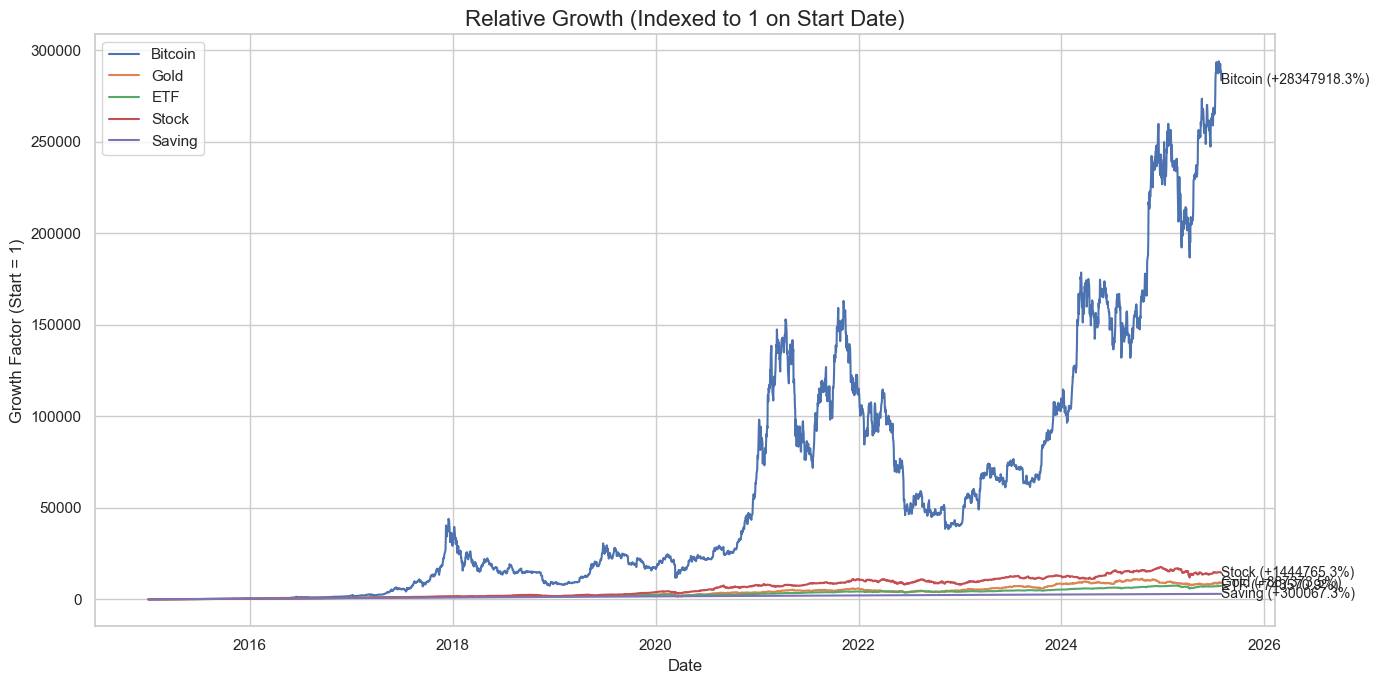

In [255]:
portfolio_value_clean = portfolio_value.ffill().dropna()
normalized = portfolio_value_clean / portfolio_value_clean.iloc[0]

normalized = portfolio_value / portfolio_value.iloc[0]

plt.figure(figsize=(14, 7))

for column in normalized.columns:
    plt.plot(normalized.index, normalized[column], label=column)
    
    # 🎯 Thêm chú thích tại điểm cuối dòng
    final_value = normalized[column].iloc[-1]
    plt.text(
        normalized.index[-1],        # ngày cuối cùng
        final_value,                 # giá trị cuối cùng
        f"{column} (+{(final_value - 1)*100:.1f}%)",   # nội dung ghi chú, ví dụ: Bitcoin (3.45x)
        fontsize=10,
        ha='left',
        va='center'
    )

plt.title("Relative Growth (Indexed to 1 on Start Date)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Growth Factor (Start = 1)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.show()

In [256]:
print(normalized.columns)


Index(['Bitcoin', 'Gold', 'ETF', 'Stock', 'Saving'], dtype='object')


In [257]:
print(normalized.isna().sum())

Bitcoin    0
Gold       0
ETF        0
Stock      0
Saving     0
dtype: int64


In [258]:
total_days = len(portfolio_value)
total_invested = total_days * 1.0  # 1€ mỗi ngày
final_values = portfolio_value.iloc[-1]
growth_rate = (final_values / total_invested - 1) * 100
summary_table = pd.DataFrame({
    'Tài sản': final_values.index,
    'Số tiền cuối cùng (€)': final_values.round(2).values,
    'Tổng tiền bỏ ra (€)': [total_invested] * len(final_values),
    'Tỷ lệ tăng trưởng (%)': growth_rate.round(2).values
})
print(summary_table)

   Tài sản  Số tiền cuối cùng (€)  Tổng tiền bỏ ra (€)  Tỷ lệ tăng trưởng (%)
0  Bitcoin              283480.18               3866.0                7232.65
1     Gold                8874.74               3866.0                 129.56
2      ETF                7436.71               3866.0                  92.36
3    Stock               14448.65               3866.0                 273.74
4   Saving                5096.66               3866.0                  31.83


In [259]:
#Advanced Metrics

In [260]:
total_days = len(portfolio_value)
total_invested = total_days * 1.0  # 1€/day

# Final value of each asset
final_values = portfolio_value.iloc[-1]

# Total return = Final value / Invested - 1
total_return = ((final_values / total_invested) - 1)*100
print("📈 Total Return (%):\n", total_return)

📈 Total Return (%):
 Bitcoin    7232.648289
Gold        129.558596
ETF          92.361851
Stock       273.736489
Saving       31.832914
Name: 2025-07-31 00:00:00, dtype: float64


In [261]:
# Years in investment period
days_diff = (portfolio_value.index[-1] - portfolio_value.index[0]).days
years = days_diff / 365.25

# CAGR formula
cagr = ((final_values / total_invested) ** (1 / years) - 1) * 100
print("📊 CAGR:\n", cagr)

📊 CAGR:
 Bitcoin    50.062014
Gold        8.169580
ETF         6.377503
Stock      13.268344
Saving      2.646108
Name: 2025-07-31 00:00:00, dtype: float64


In [262]:
# Daily returns
daily_returns = portfolio_value.pct_change().dropna()

# Annualized volatility (std dev × sqrt(252 trading days))
volatility = daily_returns.std() * (252 ** 0.5)
print("📉 Annualized Volatility:\n", volatility)

📉 Annualized Volatility:
 Bitcoin    0.648956
Gold       0.405573
ETF        0.352371
Stock      0.404504
Saving     0.325464
dtype: float64


In [263]:
#Max drawdown is the biggest % drop from a peak.
def calculate_max_drawdown(series):
    cumulative_max = series.cummax()
    drawdown = ((series - cumulative_max) / cumulative_max)*100
    return drawdown.min()

max_drawdown = portfolio_value.apply(calculate_max_drawdown)
print("📉 Max Drawdown:\n", max_drawdown)

📉 Max Drawdown:
 Bitcoin   -83.030027
Gold      -51.393716
ETF       -32.608246
Stock     -35.732579
Saving      0.000000
dtype: float64


In [264]:
#Combine All Metrics into a Table
summary = pd.DataFrame({
    'Final Value (€)': final_values.round(2),
    'Total Return (%)': (total_return).round(2),
    'CAGR (%)': (cagr).round(2),
    'Volatility (%)': (volatility*100).round(2),
    'Max Drawdown (%)': (max_drawdown).round(2)
})

print("📋 Performance Summary:\n", summary)

📋 Performance Summary:
          Final Value (€)  Total Return (%)  CAGR (%)  Volatility (%)  \
Bitcoin        283480.18           7232.65     50.06           64.90   
Gold             8874.74            129.56      8.17           40.56   
ETF              7436.71             92.36      6.38           35.24   
Stock           14448.65            273.74     13.27           40.45   
Saving           5096.66             31.83      2.65           32.55   

         Max Drawdown (%)  
Bitcoin            -83.03  
Gold               -51.39  
ETF                -32.61  
Stock              -35.73  
Saving               0.00  


In [265]:
summary.to_excel("D:/New folder/performance_summary.xlsx")
print("✅ Metrics saved to 'D:/New folder/performance_summary.xlsx'")


✅ Metrics saved to 'D:/New folder/performance_summary.xlsx'
